## Beetroot disese prediction



## Table of contents

1. About the dataset

2. Importing libraries

3. Exploratory data analysis

4. Data preprocessing

5. Model building

6. Model evaluation

## About the dataset:

Dataset include images of 'Alternaria_leaf_spot', 'Beet_western_yellows' and 'Healthy' cabbage leaves. The images are collected from various internet sources.

In [ ]:
! pip install split-folders --quiet

## Importing necessary libraries

1. Using pandas library to load dataset and data processing

2. Numpy to work with arrays and matrices

3. Matplotlib for data visualization

4. Using splitfolders , splitting the data into train, test and validation dataset

5. Using tensorflow and keras libraries for model building and training.

In [ ]:
import pandas as pd
import numpy as np
#import splitfolders
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

* Before exploring the dataset splitting the data into training , testing and validation dataset. Since I am using tensorflows "image_dataset_from_directory" to load the images, they donot have an option to split the dataset into three directories, they provide only train and validation split. However, I would like to have train, test and validation split. And using splitfolder function to do the same.

* The splifolders function splits the data with respect to the ratios. Therefore it takes the input dataset directory , the destination directory to save the splitted datasets and the ratio of the split as parameters.

* Here, by passing the dataset directory into splitfolder function, splitting the data into train, test and validation dataset providing the ratio as 80% , 10% and 10% respectively and storing it in a new folder (dataset- foldername).

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/thesis_crop_dis_pre/beetroot", output="/content/drive/MyDrive/thesis_crop_dis_pre/beetroot/dataset_bet",
     ratio=(.8, .1, .1))

Copying files: 136 files [00:46,  2.94 files/s]


Image size and batch size are assigned with default values

In [ ]:
image_size = (256, 256)
batch_size = 32

## Exploratory data analysis

Since its an image data using tensorflows " image_dataset_from_directory " to load the datasets.

Loading the train data passing parameters such as

1. directory, which gives the path of the train data

2. labels is set to 'inferred' ( since i would like to have the same label names from the directory)

3. with lables_mode as int, encoding the labels as integers

4. using a default batch size ( 32 ) to train the data

5. providing default image size (256,256)

6. also providing image channel (color_node) as 3 ie., rgb

7. since we have seperate datasets for validation, here the validation_split is set to None


* image_size and batch_size values could be assigned to a variable since we make use of it again.

In [ ]:
df_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/beetroot/dataset_bet/train',
    labels='inferred',
    label_mode ='int',
    class_names=None,
    color_mode ='rgb',
    batch_size = batch_size,
    image_size = image_size,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
)

Found 107 files belonging to 3 classes.


Since I have assigned the labels to inferred, we can get the list of class names using the method "class_names" and the names would match the subdirectory names of the data

In [ ]:
classes = df_train.class_names
classes

['Alternaria_leaf_spot', 'Beet_western_yellows', 'Healthy']

In [ ]:
for image, label in df_train.take(2):
  print(image.numpy())
  print(label.numpy())

[[[[182.       214.       115.      ]
   [184.01562  216.01562  118.359375]
   [181.375    212.92188  117.28125 ]
   ...
   [109.171875 152.17188   73.171875]
   [104.6875   147.6875    68.6875  ]
   [102.       145.        66.      ]]

  [[181.51562  213.51562  114.75781 ]
   [183.44989  215.44989  117.87311 ]
   [180.8244   212.37128  116.78552 ]
   ...
   [109.425415 152.42542   73.425415]
   [105.20972  148.20972   69.20972 ]
   [102.84766  145.84766   66.84766 ]]

  [[179.85938  211.85938  113.92969 ]
   [181.51544  213.51544  116.21039 ]
   [178.94171  210.48859  115.090454]
   ...
   [110.29236  153.29236   74.29236 ]
   [106.99536  149.99536   70.99536 ]
   [105.74609  148.7461    69.74609 ]]

  ...

  [[168.67578  183.28125  110.74609 ]
   [169.97229  186.23383  113.026794]
   [169.393    187.85455  113.86627 ]
   ...
   [154.92157  124.58502   91.12048 ]
   [165.31586  130.72992  101.17914 ]
   [173.11328  137.1836   109.64844 ]]

  [[166.60547  179.96875  107.84766 ]
   [168

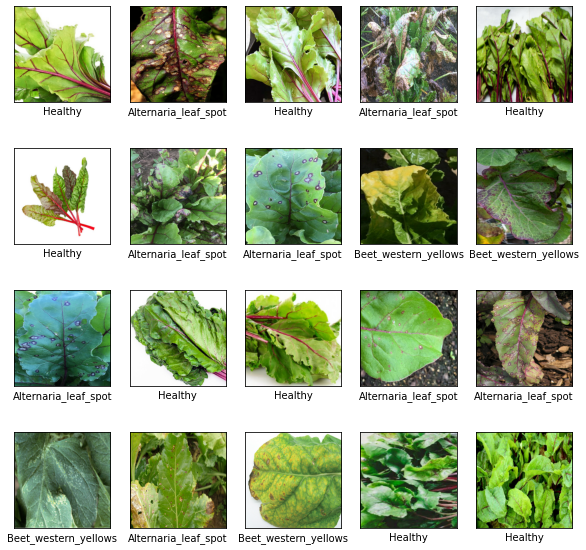

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i].numpy().astype('int'), cmap=plt.cm.binary)
    plt.xlabel(classes[label[i]])
  plt.show()

Loading validation and test dataset from the directory again through "image_dataset_from_directory" providing the default batch size and image size

In [ ]:
df_vali = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/beetroot/dataset_bet/val',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,
)

Found 11 files belonging to 3 classes.


In [ ]:
df_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/thesis_crop_dis_pre/beetroot/dataset_bet/test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size= batch_size,
    image_size= image_size,
    shuffle=True,)

Found 17 files belonging to 3 classes.


## Data preprocessing

Using tensorflows preprocessing layers

1. Resizing layers- used to change image length and widhth to (256,256)

2. Rescaling layers- to stanadradize the data

3. RandomZoom layers - to randomly zoom in or out on each axis of an image independently

In [ ]:
data_preprocessing = tf.keras.Sequential([

                                layers.experimental.preprocessing.Resizing(256,256),
                                layers.experimental.preprocessing.Rescaling(1./255, input_shape= (256,256,3)),
                                layers.experimental.preprocessing.RandomZoom(0.2)

                    ])

In [ ]:
data_augumentation = tf.keras.Sequential([
                                layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                layers.experimental.preprocessing.RandomRotation(0.2),

                    ])

Before using data augumentation on the dataset, I have tried to visualisize how it looks with this particular dataset

Using RandomFlip and RandomRotation layers

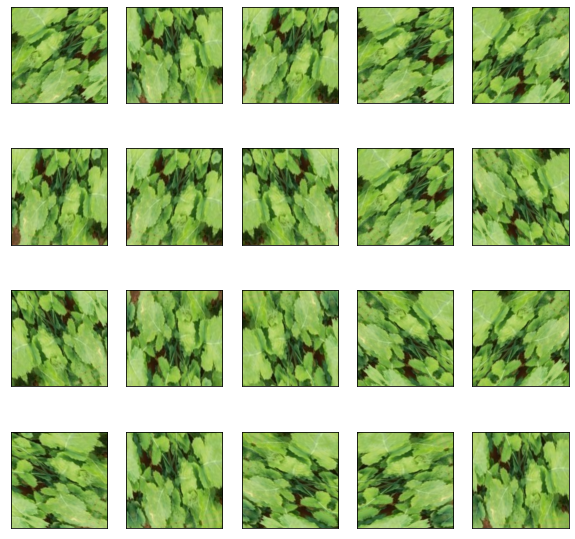

In [ ]:
for image, label in df_train.take(1):
  plt.figure(figsize=(10,10))
  for i in range(20):
    augmented_images = data_augumentation(image)
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[0].numpy().astype('int'), cmap=plt.cm.binary)

  plt.show()

## Model building

Within the sequential layers having

1. data_preprocessing as the first layer consisting of resizing, rescaling and randomzoom preprocessing layers

2. Secondly having stack of convolutional 2D and Maxpooling layers. In this case, using 4 layers of each ( tried different counts), the convolutional layers take filters to find the features of the images and its size which is given by the kernel_size and an activation function

* The first convolutional layer takes the input shape (256,256,3) which is image height, width and the rgb mode , 32 filters with size of 3* 3 and relu as its activation function. And the following convolutional layers take same kernel size and activation function but the filter value as 64

* Using maxpooling layers as it extracts the main and sharp features from the images providing size of 3 * 3

3. Within the dense network

* Having a flatten layer, which helps to reduce the dimensionality of the input to single dimension

In [ ]:
def check_opt(optimizers):

  model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dense(37, activation = 'softmax'),

    ])


  model.compile(optimizer= optimizers,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

  return model

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
train_acc = []
val_acc = []
train_loss =[]
val_loss = []

Trying out the following five optimizers and storing it in an empty lists

Looping through all the optimizers and applying to the function

Using model.fit to train the training dataset and storing it in a variable. The fit model returns an history callback object which could be called to return the loss and accuracy values

Appending the final epoch results to the list. Here since I use only 5 epochs appending the fifth loss and accuracy value with index value 4

In [ ]:
for i in optimizers:
  model = check_opt(i)
  print('With optimizer:'+ i)
  history = model.fit(df_train, epochs= 5, batch_size = 32,validation_data= df_vali)

  train_acc.append(history.history['accuracy'][4])
  val_acc.append( history.history['val_accuracy'][4])

  train_loss.append(history.history['loss'][4])
  val_loss.append(history.history['val_loss'][4])

With optimizer:Adadelta
Epoch 1/5
4/4 [==============================] - 8s 2s/step - loss: 3.6170 - accuracy: 0.0000e+00 - val_loss: 3.6185 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 7s 2s/step - loss: 3.6110 - accuracy: 0.0000e+00 - val_loss: 3.6162 - val_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 7s 2s/step - loss: 3.6096 - accuracy: 0.0000e+00 - val_loss: 3.6137 - val_accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 7s 2s/step - loss: 3.6053 - accuracy: 0.0000e+00 - val_loss: 3.6115 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 7s 2s/step - loss: 3.6049 - accuracy: 0.0000e+00 - val_loss: 3.6091 - val_accuracy: 0.0000e+00
With optimizer:Adagrad
Epoch 1/5
4/4 [==============================] - 10s 2s/step - loss: 3.5383 - accuracy: 0.0093 - val_loss: 3.3124 - val_accuracy: 0.1818
Epoch 2/5
4/4 [==============================] - 7s 2s/step - loss: 3.2045 - accuracy: 0.3364 - 

In [ ]:
data = {'Optimizers': ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'], 'Training_accuracy': [train_acc[0],train_acc [1],train_acc [2],train_acc [3],train_acc [4]],
         'Training_loss': [train_loss[0],train_loss[1],train_loss[2],train_loss[3],train_loss[4]],
         'Validation_accuracy' : [val_acc[0],val_acc[1],val_acc[2],val_acc[3],val_acc[4]],

         'Validation_loss': [val_loss[0],val_loss[1],val_loss[2],val_loss[3],val_loss[4]],
                                                                                              }

df = pd.DataFrame(data)

In [ ]:
df

,Optimizers,Training_accuracy,Training_loss,Validation_accuracy,Validation_loss
0,Adadelta,0.000000,3.604947,0.000000,3.609094
1,Adagrad,0.429907,1.906603,0.363636,1.716519
2,Adam,0.327103,1.165200,0.454545,1.102630
3,RMSprop,0.355140,1.449209,0.363636,1.105333
4,SGD,0.429907,1.286734,0.363636,1.344995


In [ ]:
model = models.Sequential([
    data_preprocessing,
    data_augumentation,
    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=( 256, 256, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(filters=64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(64, activation='relu' ),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax'),

])
model.build(input_shape = (32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_8 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_11 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 84, 84, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (32, 82, 82, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 27, 27, 64)         0         
 g2D)                                                 

In [ ]:
model.compile(optimizer= 'Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#early_stop = EarlyStopping(monitor= 'val_loss',patience = 3, restore_best_weights= True)
#model_chk = ModelCheckpoint(filepath='/content/drive/MyDrive/thesis_crop_dis_pre/beet_saved_model.hdf5',monitor= 'val_loss',save_best_only= True)
#lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3, factor = 0.1)

In [ ]:
history = model.fit(df_train, epochs= 50, batch_size = 32, validation_data= df_vali)

Epoch 1/50
4/4 [==============================] - 10s 2s/step - loss: 1.1041 - accuracy: 0.3738 - val_loss: 1.0859 - val_accuracy: 0.3636
Epoch 2/50
4/4 [==============================] - 8s 2s/step - loss: 1.0693 - accuracy: 0.4299 - val_loss: 1.0828 - val_accuracy: 0.3636
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 1.0596 - accuracy: 0.4486 - val_loss: 1.0936 - val_accuracy: 0.3636
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 1.0423 - accuracy: 0.4673 - val_loss: 1.0737 - val_accuracy: 0.3636
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 1.0658 - accuracy: 0.4486 - val_loss: 1.0655 - val_accuracy: 0.3636
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 1.0441 - accuracy: 0.4299 - val_loss: 1.0651 - val_accuracy: 0.3636
Epoch 7/50
4/4 [==============================] - 8s 2s/step - loss: 1.0310 - accuracy: 0.4299 - val_loss: 1.0483 - val_accuracy: 0.3636
Epoch 8/50
4/4 [========================

## Model evaluation

* Evaluating the model by comparing the accuracy and loss in training and validation dataset using callback function(history) and visualizing with matplotlib

In [ ]:
train_accu = history.history['accuracy']
val_accu = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Plotting training and validation accuracy and loss values with respect to each epochs

Text(0, 0.5, 'Loss')

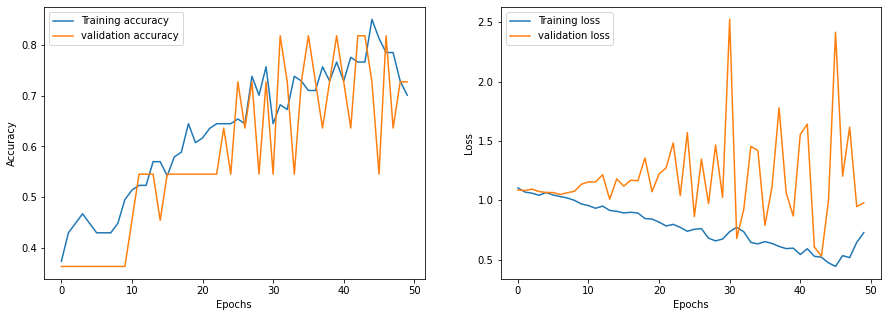

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(50),train_accu,label= 'Training accuracy')
plt.plot(range(50),val_accu,label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),train_loss,label= 'Training loss')
plt.plot(range(50),val_loss,label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
model.evaluate(df_test)

1/1 [==============================] - 0s 418ms/step - loss: 0.8839 - accuracy: 0.5882


[0.8839086890220642, 0.5882353186607361]

actual label Healthy
predicted_label Healthy


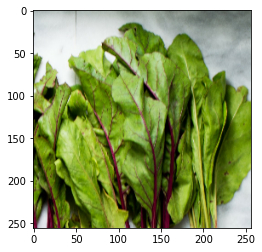

In [ ]:
for image, label in df_test.take(1):
  plt.imshow(image[1].numpy().astype('int'))
  print('actual label', classes[label[1]])

  prediction = model.predict(image)
  print('predicted_label',classes[np.argmax(prediction[1])] )

## Saving keras model

In [ ]:
import h5py

In [ ]:
save_path = '/content/drive/MyDrive/thesis_crop_dis_pre/beet_saved_model.hdf5'
model.save(save_path)

model = keras.models.load_model(save_path)